In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller


rcParams['figure.figsize'] = 15, 6

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('train_pCWxroh.csv', index_col='ID')

In [3]:
train.index

Int64Index([2011100100, 2011100101, 2011100102, 2011100103, 2011100104,
            2011100105, 2011100106, 2011100107, 2011100108, 2011100109,
            ...
            2013033114, 2013033115, 2013033116, 2013033117, 2013033118,
            2013033119, 2013033120, 2013033121, 2013033122, 2013033123],
           dtype='int64', name=u'ID', length=13152)

In [4]:
train.dtypes

Count    int64
dtype: object

In [5]:
pd.to_datetime('2011100100', format='%Y%m%d%H')

Timestamp('2011-10-01 00:00:00')

In [6]:
train.index = train.index.astype(str)

In [7]:
train.index = pd.to_datetime(train.index, format='%Y%m%d%H')

In [8]:
train.index

DatetimeIndex(['2011-10-01 00:00:00', '2011-10-01 01:00:00',
               '2011-10-01 02:00:00', '2011-10-01 03:00:00',
               '2011-10-01 04:00:00', '2011-10-01 05:00:00',
               '2011-10-01 06:00:00', '2011-10-01 07:00:00',
               '2011-10-01 08:00:00', '2011-10-01 09:00:00',
               ...
               '2013-03-31 14:00:00', '2013-03-31 15:00:00',
               '2013-03-31 16:00:00', '2013-03-31 17:00:00',
               '2013-03-31 18:00:00', '2013-03-31 19:00:00',
               '2013-03-31 20:00:00', '2013-03-31 21:00:00',
               '2013-03-31 22:00:00', '2013-03-31 23:00:00'],
              dtype='datetime64[ns]', name=u'ID', length=13152, freq=None)

In [9]:
train_ts = train['Count']

In [10]:
train_ts.head()

ID
2011-10-01 00:00:00    135
2011-10-01 01:00:00     96
2011-10-01 02:00:00    111
2011-10-01 03:00:00    102
2011-10-01 04:00:00     54
Name: Count, dtype: int64

In [11]:
train_ts['2011']

ID
2011-10-01 00:00:00    135
2011-10-01 01:00:00     96
2011-10-01 02:00:00    111
2011-10-01 03:00:00    102
2011-10-01 04:00:00     54
2011-10-01 05:00:00     57
2011-10-01 06:00:00     48
2011-10-01 07:00:00     81
2011-10-01 08:00:00     63
2011-10-01 09:00:00     81
2011-10-01 10:00:00     75
2011-10-01 11:00:00     72
2011-10-01 12:00:00     78
2011-10-01 13:00:00     66
2011-10-01 14:00:00    150
2011-10-01 15:00:00     57
2011-10-01 16:00:00    117
2011-10-01 17:00:00    123
2011-10-01 18:00:00    114
2011-10-01 19:00:00    114
2011-10-01 20:00:00     99
2011-10-01 21:00:00    111
2011-10-01 22:00:00     96
2011-10-01 23:00:00     93
2011-10-02 00:00:00    126
2011-10-02 01:00:00    141
2011-10-02 02:00:00     72
2011-10-02 03:00:00     81
2011-10-02 04:00:00     66
2011-10-02 05:00:00     66
                      ... 
2011-12-30 18:00:00     87
2011-12-30 19:00:00    126
2011-12-30 20:00:00     93
2011-12-30 21:00:00     90
2011-12-30 22:00:00     99
2011-12-30 23:00:00     9

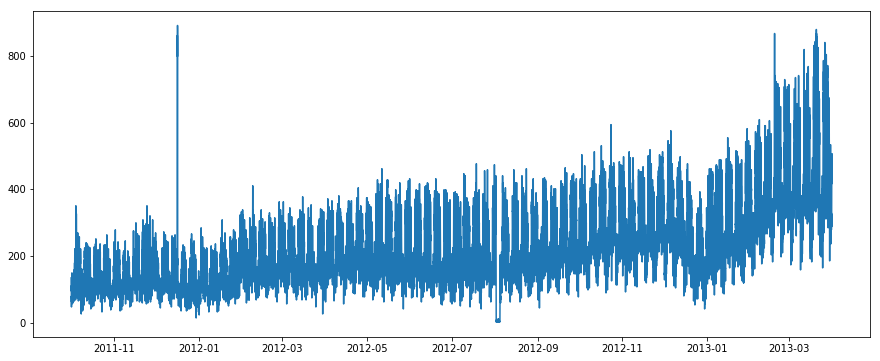

In [12]:
plt.plot(train_ts)

In [13]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24*30)
    rolstd = pd.rolling_std(timeseries, window=24*30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


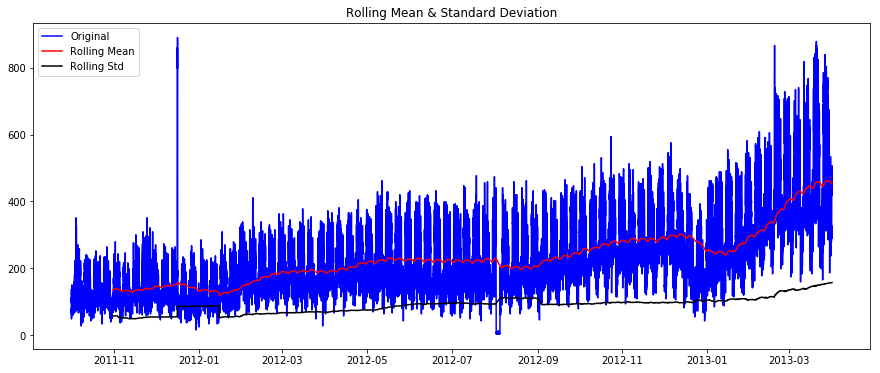

Results of Dickey-Fuller Test:
Test Statistic                -8.719046e+00
p-value                        3.425034e-14
#Lags Used                     4.100000e+01
Number of Observations Used    1.311000e+04
Critical Value (5%)           -2.861760e+00
Critical Value (1%)           -3.430849e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [14]:
test_stationarity(train_ts)

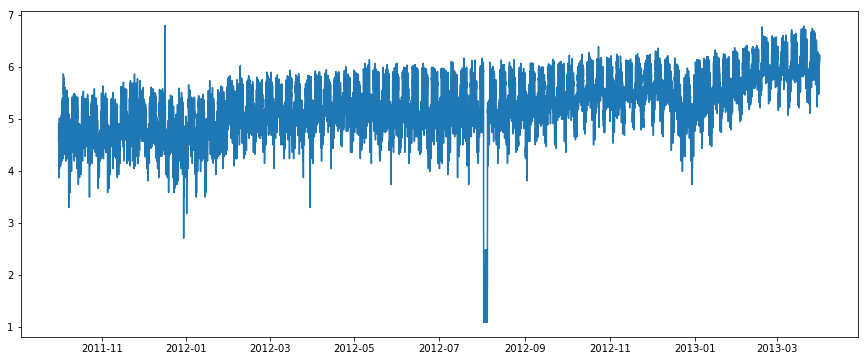

In [15]:
ts_log = np.log(train_ts)
plt.plot(ts_log)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  """Entry point for launching an IPython kernel.


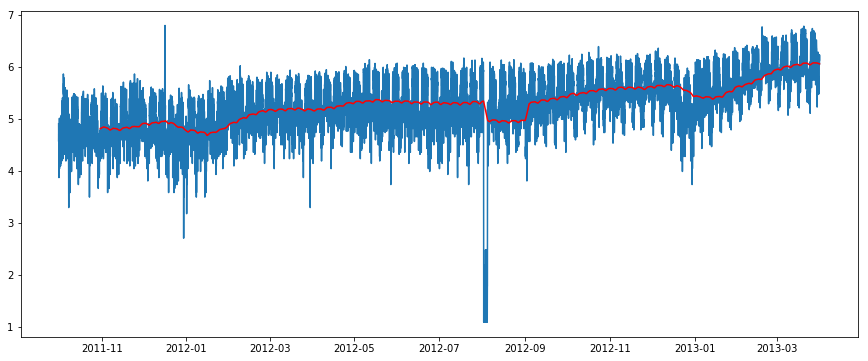

In [16]:
moving_avg = pd.rolling_mean(ts_log,24*30)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


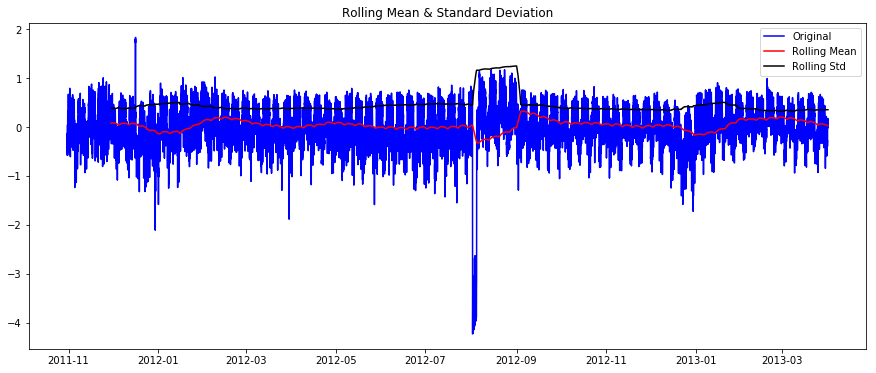

Results of Dickey-Fuller Test:
Test Statistic                -1.404396e+01
p-value                        3.265875e-26
#Lags Used                     3.900000e+01
Number of Observations Used    1.239300e+04
Critical Value (5%)           -2.861773e+00
Critical Value (1%)           -3.430878e+00
Critical Value (10%)          -2.566894e+00
dtype: float64


In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [18]:
expwighted_avg = pd.ewma(ts_log, halflife=24*30)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=720,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


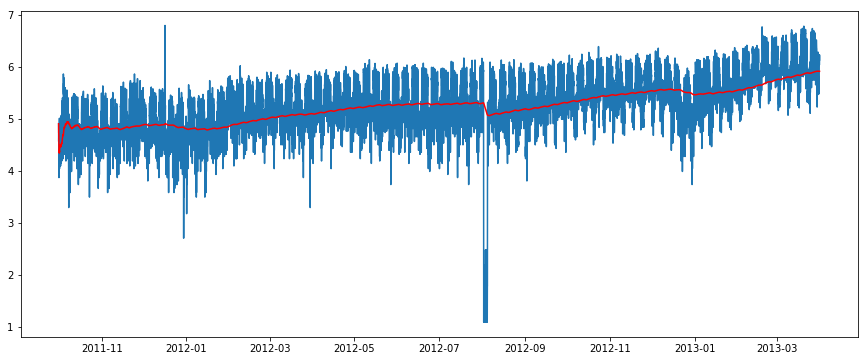

In [19]:
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


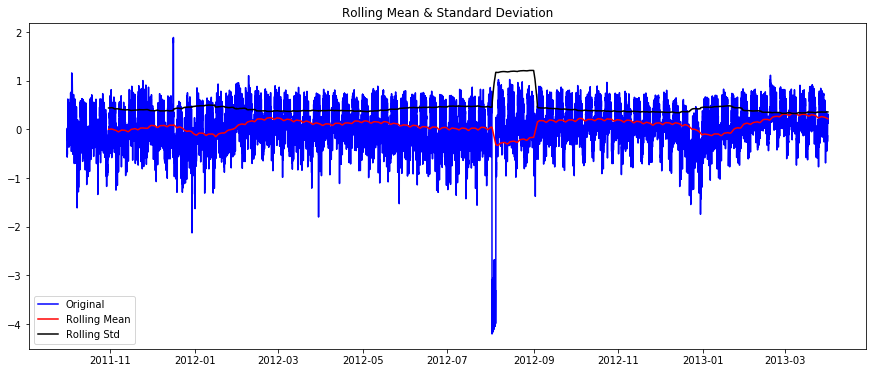

Results of Dickey-Fuller Test:
Test Statistic                -1.434541e+01
p-value                        1.043016e-26
#Lags Used                     3.900000e+01
Number of Observations Used    1.311200e+04
Critical Value (5%)           -2.861760e+00
Critical Value (1%)           -3.430849e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [20]:
train_ts_ewma_diff = ts_log - expwighted_avg
test_stationarity(train_ts_ewma_diff)

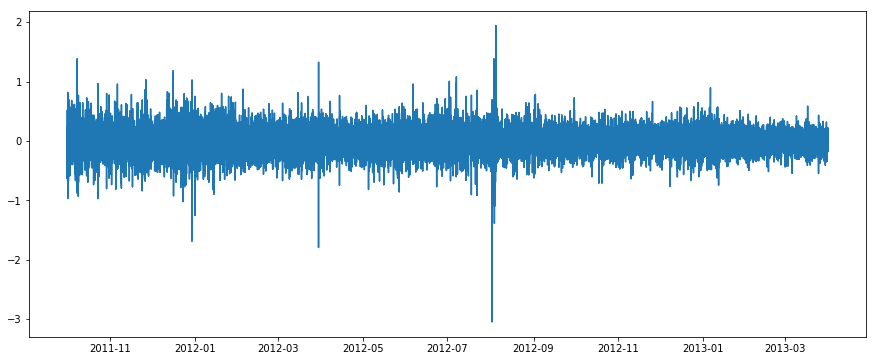

In [21]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


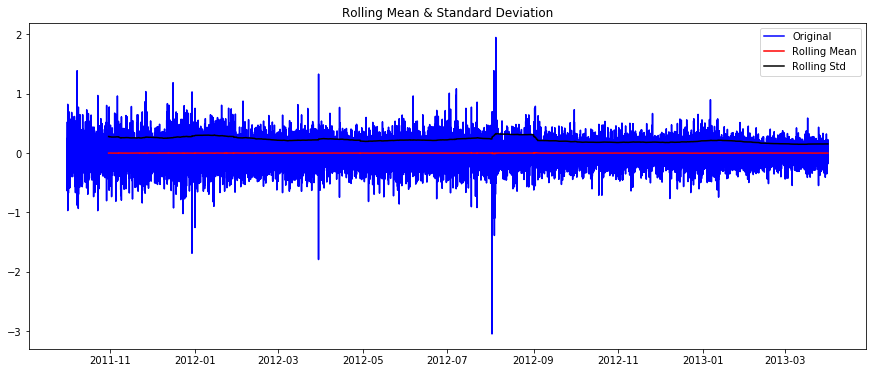

Results of Dickey-Fuller Test:
Test Statistic                   -19.274435
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    13109.000000
Critical Value (5%)               -2.861761
Critical Value (1%)               -3.430849
Critical Value (10%)              -2.566887
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

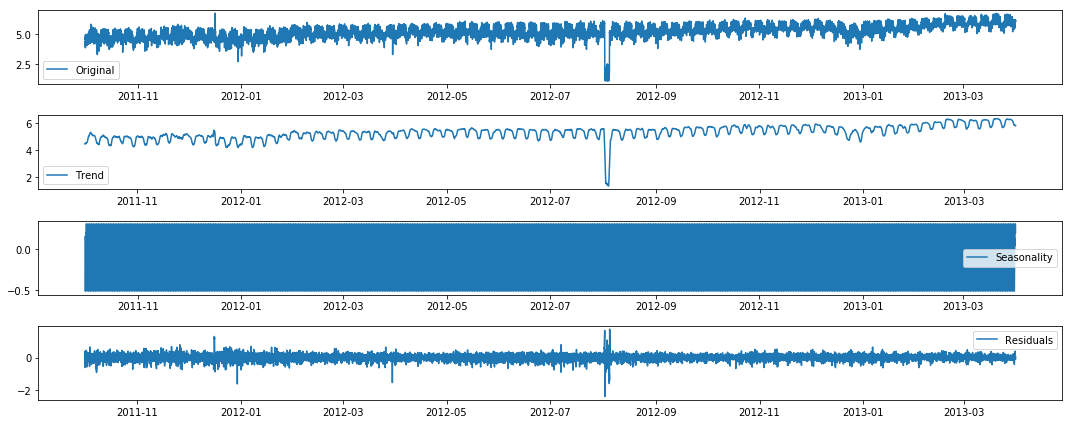

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).mean()
  after removing the cwd from sys.path.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=720,center=False).std()
  """


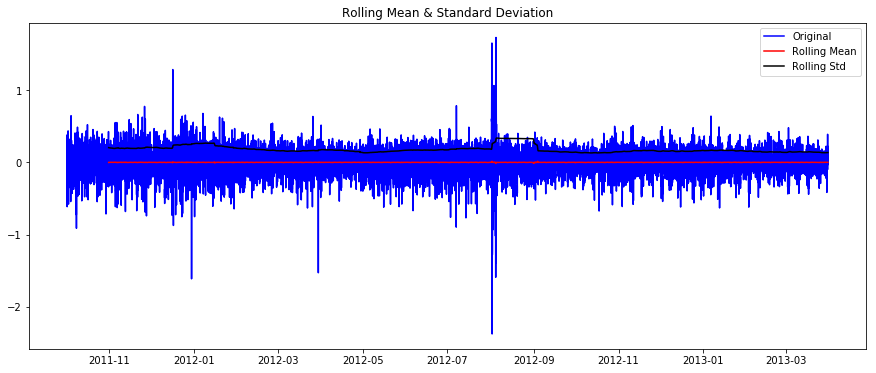

Results of Dickey-Fuller Test:
Test Statistic                   -26.521664
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    13089.000000
Critical Value (5%)               -2.861761
Critical Value (1%)               -3.430850
Critical Value (10%)              -2.566888
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [25]:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

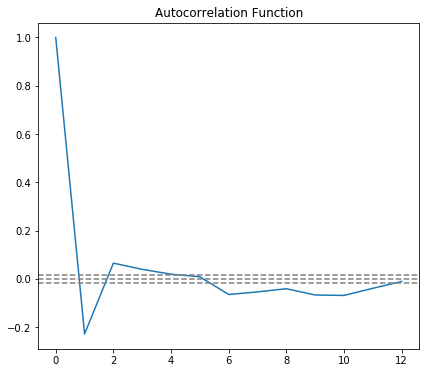

In [27]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

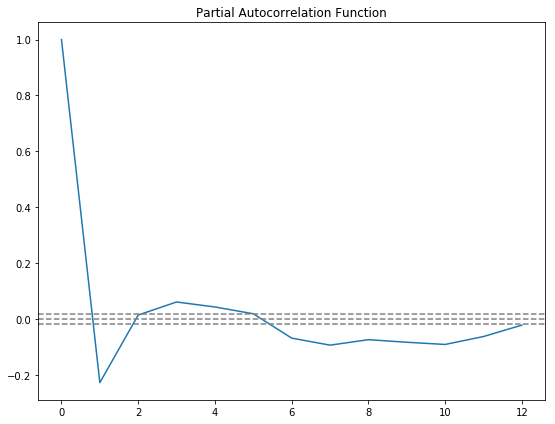

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(ts_log, order=(12, 1, 12))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train_ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train_ts)**2)/len(train_ts)))

In [ ]:
ts_log.head()

In [ ]:
test = pd.read_csv('test_bKeE5T8.csv')

In [ ]:
test.ID = test.ID.astype(str)
test.ID = pd.to_datetime(test.ID, format='%Y%m%d%H')

In [ ]:
prediction = pd.Series(results_ARIMA.forecast(steps=len(test.ID))[0])

In [ ]:
prediction = np.exp(prediction)

In [ ]:
prediction = prediction.astype(int)

In [ ]:
prediction.head()

In [ ]:
submit = pd.read_csv('test_bKeE5T8.csv')

In [ ]:
submit.head()

In [ ]:
submit.Count = prediction

In [ ]:
submit.to_csv('submission.csv')

In [ ]:
len(submit.ID)

In [ ]:
len(test)